In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
dataframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [6]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataframe["label"] = dataset.target

In [8]:
dataframe.shape

(569, 31)

In [11]:
dataframe["label"].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

In [14]:
dataframe.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
X = dataframe.drop(columns="label", axis=1)
y = dataframe["label"]

In [16]:
X.shape, y.shape

((569, 30), (569,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [19]:
len(y_train)

455

In [23]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras

In [45]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(30,)),
  keras.layers.Dense(20, activation="relu"),
  keras.layers.Dense(2, activation="sigmoid"),
])

In [46]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 0.2210 - accuracy: 0.9071 - val_loss: 0.1225 - val_accuracy: 0.9348
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2114 - accuracy: 0.9193 - val_loss: 0.0996 - val_accuracy: 0.9565
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.1981 - accuracy: 0.9218 - val_loss: 0.1074 - val_accuracy: 0.9348
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.9095 - val_loss: 0.1488 - val_accuracy: 0.9348
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1970 - accuracy: 0.9169 - val_loss: 0.1133 - val_accuracy: 0.9565
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1946 - accuracy: 0.9169 - val_loss: 0.1011 - v

In [33]:
history.history

{'loss': [0.2209533452987671,
  0.21141590178012848,
  0.19805924594402313,
  0.23113365471363068,
  0.19696083664894104,
  0.1945716142654419,
  0.19501225650310516,
  0.19643183052539825,
  0.21524643898010254,
  0.21331943571567535,
  0.18337541818618774,
  0.18339774012565613,
  0.19642062485218048,
  0.18967299163341522,
  0.17654617130756378,
  0.18144585192203522,
  0.2298312932252884,
  0.24354331195354462,
  0.25896409153938293,
  0.20158939063549042,
  0.20592819154262543,
  0.21500703692436218,
  0.22508862614631653,
  0.21681395173072815,
  0.19861990213394165,
  0.2225445955991745,
  0.1999702751636505,
  0.19827762246131897,
  0.18275366723537445,
  0.1742234230041504,
  0.16482087969779968,
  0.18242928385734558,
  0.2264660745859146,
  0.1972629427909851,
  0.17820405960083008,
  0.21335946023464203,
  0.2946752905845642,
  0.24108339846134186,
  0.215770423412323,
  0.1884523630142212,
  0.2350139021873474,
  0.2001596987247467,
  0.19749437272548676,
  0.1991299241781

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [37]:
X_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [47]:
history_std = model.fit(X_train_std, y_train, validation_split=0.1, epochs=50)

Epoch 1/50
13/13 [==============================] - 0s 14ms/step - loss: 1.0715 - accuracy: 0.4279 - val_loss: 0.8075 - val_accuracy: 0.5870
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7150 - accuracy: 0.6699 - val_loss: 0.5526 - val_accuracy: 0.7609
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.5022 - accuracy: 0.7995 - val_loss: 0.4003 - val_accuracy: 0.8913
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.8435 - val_loss: 0.3112 - val_accuracy: 0.9130
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.8826 - val_loss: 0.2552 - val_accuracy: 0.9348
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2527 - accuracy: 0.9193 - val_loss: 0.2178 - v

2022-08-28 11:53:06.451278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-28 11:53:06.634706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [48]:
history_std.history

{'loss': [1.0714856386184692,
  0.7149996757507324,
  0.5022171139717102,
  0.38134005665779114,
  0.3062962293624878,
  0.25269725918769836,
  0.21767278015613556,
  0.19007988274097443,
  0.17053255438804626,
  0.1551087200641632,
  0.14342182874679565,
  0.1333472579717636,
  0.12566585838794708,
  0.11837176233530045,
  0.11211711913347244,
  0.10687290132045746,
  0.10189412534236908,
  0.09756771475076675,
  0.09340403974056244,
  0.0896729901432991,
  0.08634606003761292,
  0.08309835195541382,
  0.08011525869369507,
  0.07747034728527069,
  0.0747324675321579,
  0.07223078608512878,
  0.07002905756235123,
  0.06790228188037872,
  0.06587433815002441,
  0.0640672817826271,
  0.06225946173071861,
  0.06070353090763092,
  0.059276193380355835,
  0.05770670622587204,
  0.05634690821170807,
  0.05506300926208496,
  0.05384199693799019,
  0.052615050226449966,
  0.051544904708862305,
  0.05053383857011795,
  0.04951958358287811,
  0.04845833405852318,
  0.047590047121047974,
  0.0466

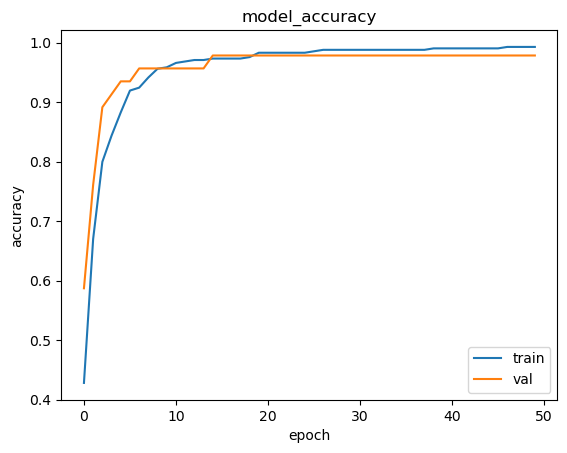

In [49]:
plt.plot(history_std.history["accuracy"])
plt.plot(history_std.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="lower right")
plt.show()

In [50]:
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


2022-08-28 11:54:20.004420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [51]:
y_pred.shape

(114, 2)

In [52]:
y_pred[0]

array([0.30469525, 0.80094934], dtype=float32)

In [53]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [54]:
y_pred_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]